## Introducción 
El objetivo de esta actividad es poner en práctica la resolución de problemas para realizar un experimento de regresión lineal. Hay 5 potenciales problemas a considerar a la hora de preparar una base de datos:
- Huecos: datos faltantes dentro de columnas
- Variables cualitativas: son datos no númericos por lo que no es posible incluir datos a los que no se les puedan aplicar formulas matemáticas
- Interacciones: variables que por si mismas no tienen mucho impacto en el modelo pero juntas si tienen impacto más significativo a la variable interés . 
- Outliers: datos que están sobre o por bajo del rango normal de respuestas
- Colinealidad: variables que tienen correlación muy alta y que terminan midiendo prácticamente lo mismo.  
Tomando en cuenta los posibles problemas a presentar, podemos prevenir malos modelos con técnicas de identificación y resolución de problemas.

Para encontrar el mejor modelo posible se realizarán pruebas unitarias. A continuación se presentará la base de datos a experimentar, habrá un paso a paso de identificación de problema y resolución en el conjunto de datos representada con tablas de datos y gráficas, y finalmente se presentará el modelo de regresión final. Partimos afirmando que se buscara evidencia de que si existe un subconjunto óptimo de predictores con capacidad explicativa estadísticamente significativa. 
La validación de esta hipótesis se basará en:
- Significancia global: Estadístico F y su p-valor
- Capacidad explicativa: R² y R² ajustado
- Impacto individual por variable: p-valores de coeficientes
- Precisión por modelo: MAE y RMSE

Utilizando los datos de la investigación de UC Irvine donde consiguieron datos demográficos, social y características escolares, así como la calificación de primer parcial, segundo parcial y calificación final. Podemos observar un conjunto de datos con un total de 395 observaciones con 10 variables. 

Variables categórica nominal
Variables que indican el 
- Escuela: se tomaron en cuenta dos escuelas, MS representa Mousinho da Silveira y GP representa Gabriel Pereira
- Sexo: hombre o mujer
- Internet:  acceso a internet en casa
  
Variables cuantitativas
- Edad: edad del estudiante
- HorasDeEstudio: horas dedicadas al estudio semanalmente
- Reprobadas: cantidad de materias reprobadas
- Faltas: cantidad de faltas a clases
- G1: calificación de primer parcial
- G2: calificación de segundo parcial
- G3: calificación final

Link de origen datos: https://archive.ics.uci.edu/dataset/320/student+performance 

Prevista de base de datos:

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# cargar datos
df = pd.read_csv("A1.3 Calificaciones.csv")
df

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,2,no,11,9,9,9
391,MS,M,17,1,0,yes,3,14,16,16
392,MS,M,21,1,3,no,3,10,8,7
393,MS,M,18,1,0,yes,0,11,12,10


## Metodología

### Exploración de datos

A continuación, primeramente se despliegan datos generales sobre las columnas de variables númericas. Mide si la cantidad de datos que tiene cada una, su promedio, desviación estándar, minimo, máximo y cuartiles. En la tabla siguiente, se muestran los datos de las variables cualitativas. Cantidad que tiene cada una, cuantos tipos de respuestas tiene, el dato más repetido y la frecuencia en la que se repite. Esta exploración inicial nos ayuda a determinar el aspecto general por columna. Teniendo su promedio, máximos y minimos podemos observar posibles outliers. Su número total de datos por columna indica si existen huecos en el conjunto y su desviación estándar nos ayuda a entender la variabilidad de respuestas por columna. 

In [10]:
df.describe()

,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
df.describe(include='object')

/var/folders/5k/22cx293161x_zcj11k6fhdc40000gn/T/ipykernel_58942/87514550.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,Escuela,Sexo,Internet
count,395,395,395
unique,2,2,2
top,GP,F,yes
freq,349,208,329


Verificamos si hay algún dato faltante en alguna de las variables de la base de datos. La lista muestra que no hay huecos en ninguna de as columnas registradas. 

In [81]:
print(df.isnull().sum())

Edad                0
HorasDeEstudio      0
Reprobadas          0
Faltas              0
G1                  0
G2                  0
G3                  0
Sexo_M              0
Escuela_MS          0
Internet_yes        0
Faltas_Horas        0
Reprobadas_Horas    0
Horas_Internet      0
Reprobada_falta     0
dtype: int64


Este mapa de calor nos ayuda a indicar si existen variables con correlación muy alta con otras variables. Entre más fuerte el color, más correlación indica. Existen correlaciones moderadas entre materia reprobadas y las calificaciones G1, G2, G3; es lógico que exista una correlación entre estas variables y siendo una correlación de un rango menor a 0.4 aún es una correlación que no obstruye en los resultados de la regresión lineal. Sin embargo, hay correlaciones de 0.8-0.9 entre G1, G2 y G3. Teniendo una correlación tan alta, los datos ya no indican interpretación sino causan un efecto de predicción, lo que puede inflar el resultado de la R cuadrada en un modelo de regresión final. Es importante evitar incluir variables con tan alta correlación dado a qué causan fuga de datos. En vez de crear un modelo predictivo, creas un modelo con una respuesta asegurada.  

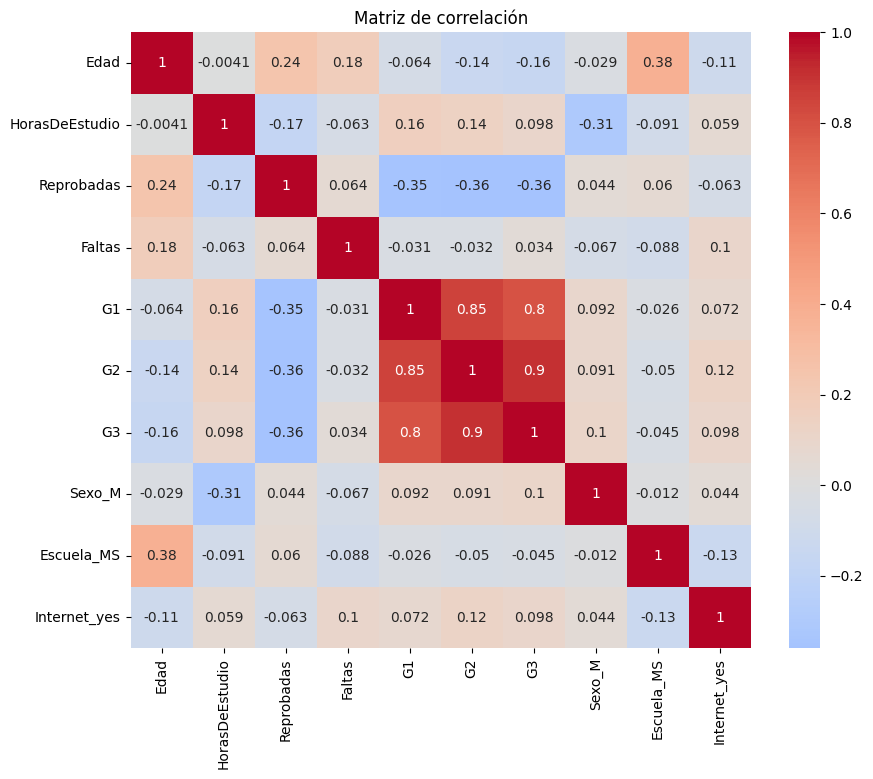

In [32]:
### Colinealidad

corr_matrix = df.corr(numeric_only=True)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()



Se realizó el método tukey en el conjunto de datos. El método tukey sirve para identificación de datos atípicos tomando los cuartiles de la variable e identificando si sobrepasan el rango normal. Se muestra en la gráfica siguiente las variables con datos atípicos, el rango normal se encuentra dentro de la caja y los puntos negros son datos fuera del rango. Edad, HorasDeEstudio, Reprobadas y G2 parecen tener unos cuantos datos atípicos, lo que es normal entre información de estudiantes. La variable con más datos atípicos y casos exagerados es la columna de faltas. Aunque es lógico que posiblemente si haya más variedad en esta columna, debemos analizar si los outliers no dañarían el modelo de regresión. 

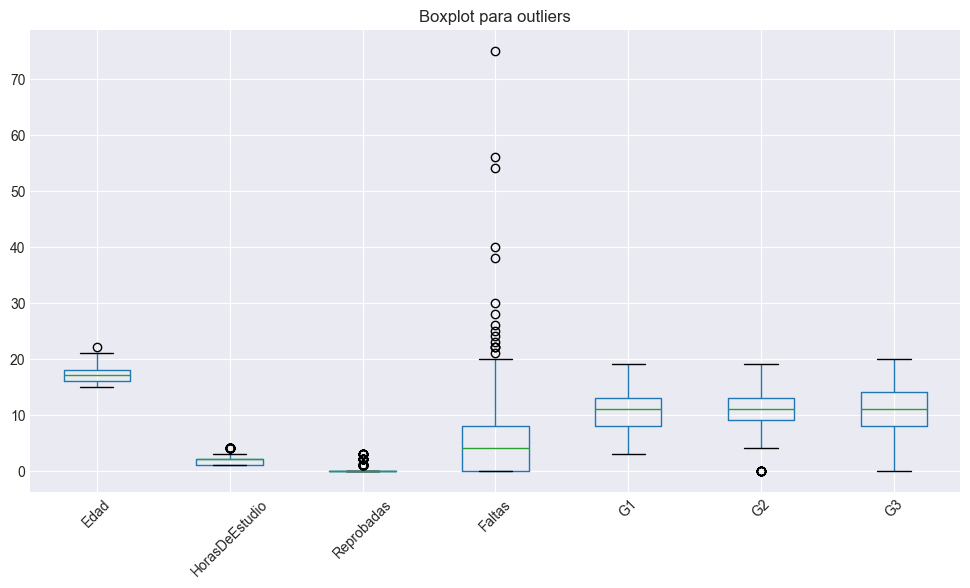

In [215]:
# Seleccionar solo columnas numéricas
numericas = df.select_dtypes(include=['int64','float64']).columns

# Diccionario para almacenar los outliers por columna
outliers_dict = {}

for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outliers_dict[col] = outliers

plt.figure(figsize=(12,6))
df[numericas].boxplot(rot=45)
plt.title("Boxplot para outliers")
plt.show()


Los siguientes modelos indican interacciones probadas entre las variables que se notaron tener correlaciones moderadas o correlaciones lógicas. 


In [209]:
import statsmodels.formula.api as smf

modelo = smf.ols('G3 ~ Reprobadas * HorasDeEstudio', data=df).fit()

print('-----------------------------Reprobadas * HorasDeEstudio-------------------------------------')
print(modelo.summary())

modelo1 = smf.ols('G3 ~ Faltas * HorasDeEstudio', data=df).fit()
print('-----------------------------Faltas * HorasDeEstudio-------------------------------------')
print(modelo1.summary())

modelo2 = smf.ols('G3 ~ Faltas * Reprobadas', data=df).fit()
print('-----------------------------Faltas * Reprobadas-------------------------------------')
print(modelo2.summary())

modelo3 = smf.ols('G3 ~ Edad * Reprobadas', data=df).fit()
print('-----------------------------Edad * Reprobadas-------------------------------------')
print(modelo3.summary())


-----------------------------Reprobadas * HorasDeEstudio-------------------------------------
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     19.94
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.80e-12
Time:                        00:23:14   Log-Likelihood:                -1133.1
No. Observations:                 395   AIC:                             2274.
Df Residuals:                     391   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Preparación y limpieza de los datos
#### Variables cualitativas
Las siguientes variables cualitativas son:
"Escuela" 
"Internet" 
"Sexo"
Transformación a aplicar:
Para poder implementar estas variables al modelo de regresión lineal se aplicará el método de dummy. El método dummy es simplemente darle un valor númerico a las categorías de la variable. Por ejemplo, un "SI" se convierte en un valor de 1 y "NO" se convierte en un valor de 0.
  
#### Colinealidad
La variable objetivo en esta regresión lineal es G3, la calificación final del curso. Sin embargo, las variables G2 y G1 tienen mucha probabilidad de tener relación mucho más alta con G3 que puede llegar a perjudicar su interacción con otras variables. Incluir estas variables provocan un R-cuadrada artificial y fuga de datos. Se crearía un modelo que predice el resultado usando prácticamente el mismo dato. 
Transformación a aplicar:
Exclusión de una o ambas variables del modelo. 

#### Huecos
A la hora de intentar correr el modelo de regresión anterior, no se encontraron huecos con NaN. Si se hubieran encontrado huecos en la base de datos, se determinaría si se eliminarían las tuplas de información por completo o imputación del promedio de datos en el hueco faltante. 

#### Interaccciones
Se probaron interacciones dado a su correlación lógica y mostrada en la matriz de correlación. 
- Faltas × HorasDeEstudio
- Faltas × Reprobadas
- Reprobadas × HorasDeEstudio
- Reprobadas x Edad

Se encontró una interacción entre **Faltas y Reprobadas** y otra interacción entre **Reprobadas y Edad** que son estadísticamente significativas. 

#### Outliers
Al correr la descripción del conjunto de datos, se encontró que el promedio de faltas es de 5 sin embargo, el máximo número de faltas encontrado fueron de 75 por un estudiante y con ayuda del método tukey, se encontraron más de 20 datos atípicos en esta columna. A pesar de ser cantidades extremas de faltas, son datos que son posibles y datos de estudiantes por lo que se busca reducir su influencia sobre eliminar los datos, ya que son datos valiosos en la investigación.
Transformación a aplicar:
Transformación logarítmica para reducir la influencia de outliers.
En cuanto a demás variables con outliers, se mantienen valores originales dado a la poca cantidad de outliers.


#### Transformación de variables cualitativas a valores dummy
True/False son equivalentes a los 0/1 como se menciona anteriormente.

In [16]:
### Variables cualitativas

df = pd.get_dummies(df, columns=['Sexo','Escuela','Internet'], drop_first=True)

df

,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3,Sexo_M,Escuela_MS,Internet_yes
0,18,2,0,6,5,6,6,False,False,False
1,17,2,0,4,5,5,6,False,False,True
2,15,2,3,10,7,8,10,False,False,True
3,15,3,0,2,15,14,15,False,False,True
4,16,2,0,4,6,10,10,False,False,False
...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,11,9,9,9,True,True,False
391,17,1,0,3,14,16,16,True,True,True
392,21,1,3,3,10,8,7,True,True,False
393,18,1,0,0,11,12,10,True,True,True


#### Transformación logarítmica de Faltas

In [204]:
df['Faltas_log'] = np.log1p(df['Faltas'])
df['Faltas_log']

0      1.945910
1      1.609438
2      2.397895
3      1.098612
4      1.609438
         ...   
390    2.484907
391    1.386294
392    1.386294
393    0.000000
394    1.791759
Name: Faltas_log, Length: 395, dtype: float64

### Análisis de relaciones entre variables
Como ya se mencionó anteriormente, las variables G1, G2 y G3 tienen una correlación peligrosamente alta en un experimento de regresión lineal. Si se llegan a incluir en un modelo aparecerá una R-cuadrada muy cercana al 1, lo que falsamente nos indicaría que el modelo predice con excelente precisión. A esto se le llama fuga de datos. La combinación de las variables G1 y G2 indican una calificación que esencialmente es lo mismo entonces siempre se prediciría G3 con precisión, un modelo con estos datos nos engañan a pensar que las demás variables explicativas aportan a la predicción, cuando no es cierto. Lo correcto en este caso es eliminar G1 y dejar solamente una parte de la calificación para que otras variables explicativas tengan aporte al modelo. 

### Selección de características
Para elegir las variables, se utilizó el método de eliminación hacia atrás. Es decir, se realizaron varias pruebas de modelos de regresión lineal, el primero ingresando todos los datos (a excepción de G1 ). El proceso se inició con un modelo que incluía todas las variables  restantes, transformadas si necesitaban (Escuela_MS, Sexo_M, Internet_yes, Edad, HorasDeEstudio, Reprobadas, Faltas_log).

Una vez que se ingresaron todas las variables, se evalúo el modelo y considerando el valor p individual, se descartó primeramente la variable explicativa que no cumplía con un valor p en el rango de p>0.05, sin el rango predeterminado indica que no tiene un impacto significativo. El primer valor descartado fue "Escuela_MS" con un valor p de 0.3, significando que el origen de la escuela de un estudiante no tiene impacto en su desempeño individual. La siguiente variable a descartar fue "Internet_yes", con un valor p que no cumplía con el rango para ser lo suficientemente significante en el modelo.

La siguiente variable a consideración de eliminación fue "Edad" con un valor p de 0.058. Aunque no cumple perfectamente el rango del valor p, la inclusión de la variable se debe a las siguientes consideraciones:
- La eliminación de Edad no mejoraba el BIC del modelo y reducía ligeramente el R-cuadrado ajustado
- Se encontró una interacción significativa entre "Edad" y "Reprobadas" sugiriendo que su efecto podía no ser completamente independiente.

Para el modelo de regresión final se utilizaron las siguientes variables (G2, Edad, Reprobadas, Faltas_log).


### Entrenamiento y evaluación del modelo
A continuación se entrena y prueba un modelo de regresión lineal múltiple y para garantizar la prevención de fuga de datos y su validez se tomaron las siguientes medidas:
- Según Galarnyk (2022), la división de datos en entrenamiento (80%) y datos de prueba (20%) es una manera de evaluar qué tan bueno es un modelo generalizando de nuevos datos. En este caso, buscamos un modelo que pueda predecir la calificación según datos proporcionados. Los datos de prueba nos ayuda a verificar que el modelo utiliza variables explicativas que aportan a una predicción y permite evaluar la capacidad del modelo para generalizar a observaciones no vistas durante el entrenamiento.
- Escalado de datos, se escalaron los datos con el objetivo normalizar el rango de las variables explicativas seleccionadas, asegurando que contribuyan todas por igual. El ajustado de datos fue aplicado a datos de entrenamiento y a las pruebas. Esto previene la fuga de datos.
- Se utiliza el modelo de regresión lineal OLS con el que podemos evaluar la R-cuadrada, valores P individuales, valor BIC y métricas de precisión. 


**R-cuadrada: 0.850**: El modelo obtuvo una R-cuadrada de 0.85, significando que el modelo puede explicar el 0.85 de variabilidad del modelo. 


**p-valor**: Todos los valores de variables explicativas cumple con el rango menor a 0.05 lo que indica que las variables incluidas tienen impacto significativo. 


**MAE entrenamiento: 1.52** El modelo se equivoca en promedio por 1.52 en la predicción de puntos.

**MAE prueba: 1.377** El modelo de prueba se equivoca en promedio por 1.377 en la predicción de puntos, mejorando su predicción con nuevos datos. 

**RMSE entrenamiento: 1.77**: El modelo en entrenamiento tiene un 1.77 de magnitud promedio de error

**RMSE prueba: 2.085**: El modelo en prueba tiene un 1.77 de magnitud promedio de error, ligeramente mayor al de entrenamiento 


In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['G2', 'Edad', 'Reprobadas', 'Faltas_log']]
y = df['G3']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **DataFrame y agregar const
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# agrega const para intercepto
X_train_final = sm.add_constant(X_train_scaled_df, has_constant='add')
X_test_final = sm.add_constant(X_test_scaled_df, has_constant='add')



model = sm.OLS(y_train, X_train_final).fit()

print(model.summary())

# Predicciones
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('---------------------MÉTRICAS------------------------------------')
print('MAE_TRAIN: ',mae_train,'MAE_TEST: ',mae_test)
print('RMSE_TRAIN: ',rmse_train,'RMSE_TEST: ',rmse_test)




                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     441.2
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          8.55e-127
Time:                        09:21:22   Log-Likelihood:                -629.53
No. Observations:                 316   AIC:                             1269.
Df Residuals:                     311   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3259      0.101    102.648      0.0

In [ ]:
r2_test = model.score(X_test_final, y_test)
r2_test

## Conclusión 
Concluyendo este experimento, se encontró evidencia de que si existen variables explicativas en el estudio que impactan significativamente en la calificación final. En esta actividad se realizo una exploración profunda de datos, identificando posibles problemas que pueden prevenir de hacer uso del potencial real de variables explicativas. Sin la exploración e identificación de problema, la regresión lineal habría tenido variables seleccionadas muy distintas y con una calidad muy baja. En la vida real, la captura de datos puede tener errores humanos, rangos no númericos, datos extremos, etc.  Muchas variables explicativas pueden tener un impacto estadístico significativo en la vida real, pero a veces el acomodo y captura de datos no es ideal para ingresar los datos directamente a un modelo. En la formación de aplicaión a inteligencia artificial es importante preparar los datos para sacar su mejor potencial predictivo. 

## Referencias


In [ ]:
Galarnyk, M. (2022, julio 28). Train test split: What it means and how to use it. Built In. https://builtin.com/data-science/train-test-split 

Link de fuente de datos usados
UCI machine learning repository. (s/f). Uci.edu. Recuperado el 2 de febrero de 2026, de https://archive.ics.uci.edu/dataset/320/student+performance